# simple linear regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
# provide data
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1,1))
y = np.array([5, 20, 14, 32, 22, 38])


In [3]:
x

array([[ 5],
       [15],
       [25],
       [35],
       [45],
       [55]])

In [4]:
y

array([ 5, 20, 14, 32, 22, 38])

In [5]:
#creat model and fit
model = LinearRegression()

In [6]:
model.fit(x, y)

LinearRegression()

In [7]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(normalize=False)

In [8]:
model = LinearRegression().fit(x,y)

In [9]:
r_sq = model.score(x, y)
print('coefficent of determination:', r_sq)

coefficent of determination: 0.7158756137479542


In [10]:
model.intercept_ #nilai b0

5.633333333333329

In [11]:
model.coef_ #nilai b1

array([0.54])

In [12]:
new_model = LinearRegression().fit(x, y.reshape((-1,1)))
print(model.intercept_)
print(model.coef_)

5.633333333333329
[0.54]


In [13]:
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

predicted response:
[ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]


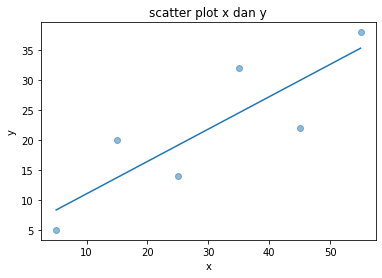

In [14]:
plt.scatter(x, y, alpha=0.5)
plt.plot(x, y_pred)

plt.title('scatter plot x dan y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [15]:
y_pred = model.intercept_ + model.coef_ * x
print('predict response:', y_pred, sep='\n')

predict response:
[[ 8.33333333]
 [13.73333333]
 [19.13333333]
 [24.53333333]
 [29.93333333]
 [35.33333333]]


# multiple linear regression

In [16]:
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)
print(x)
print(y)

[[ 0  1]
 [ 5  1]
 [15  2]
 [25  5]
 [35 11]
 [45 15]
 [55 34]
 [60 35]]
[ 4  5 20 14 32 22 38 43]


In [17]:
model = LinearRegression().fit(x, y)

In [18]:
r_sq = model.score(x, y)
print('koefisien determination:',r_sq)
print(model.intercept_)
print(model.coef_)

koefisien determination: 0.8615939258756775
5.52257927519819
[0.44706965 0.25502548]


In [19]:
y_pred = model.predict(x)
print('predict response:', y_pred, sep='\n')

predict response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


In [20]:
y_pred = model.intercept_ + np.sum(model.coef_ * x, axis=1)
print('predict response:', y_pred, sep='\n')

predict response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


In [21]:
x_new = np.arange(10).reshape((-1, 2))
print(x_new)
y_new = model.predict(x_new)
print(y_new)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
[ 5.77760476  7.18179502  8.58598528  9.99017554 11.3943658 ]


# polynomial linear regression

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [26]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1,1)) #array 2 dimensi
y = np.array([15, 11, 2, 8, 25, 35])

In [25]:
print(x)
print(y)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
[15 11  2  8 25 35]


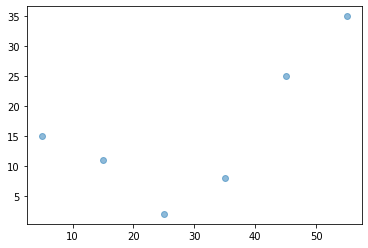

In [23]:
plt.scatter(x, y, alpha=0.5)

In [32]:
#mengubah input array 
transformer = PolynomialFeatures(degree=2, include_bias=False)

In [34]:
transformer.fit(x)

PolynomialFeatures(include_bias=False)

In [35]:
x_ = transformer.transform(x)

In [36]:
#atau bisa menggunakan
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)

In [37]:
print(x_)

[[   5.   25.]
 [  15.  225.]
 [  25.  625.]
 [  35. 1225.]
 [  45. 2025.]
 [  55. 3025.]]


In [38]:
model = LinearRegression().fit(x_, y)

In [39]:
r_sq = model.score(x_, y)
print('koefisien determination:',r_sq)
print(model.intercept_)
print(model.coef_)

koefisien determination: 0.9249215070643642
22.216071428571432
[-1.44142857  0.03107143]


## argumen transformation dan regression yang berbeda

In [40]:
x_ = PolynomialFeatures(degree=2, include_bias=True).fit_transform(x)

In [41]:
print(x_)

[[1.000e+00 5.000e+00 2.500e+01]
 [1.000e+00 1.500e+01 2.250e+02]
 [1.000e+00 2.500e+01 6.250e+02]
 [1.000e+00 3.500e+01 1.225e+03]
 [1.000e+00 4.500e+01 2.025e+03]
 [1.000e+00 5.500e+01 3.025e+03]]


In [42]:
model = LinearRegression(fit_intercept=False).fit(x_, y)

In [43]:
r_sq = model.score(x_, y)
print('koefisien determination:',r_sq)
print(model.intercept_)
print(model.coef_)

koefisien determination: 0.9249215070643642
0.0
[22.21607143 -1.44142857  0.03107143]


In [46]:
y_pred = model.predict(x_)
print('predicted response:', y_pred, sep='\n')

predicted response:
[15.78571429  7.58571429  5.6         9.82857143 20.27142857 36.92857143]


# Linear Regression with statmodels

In [47]:
import numpy as np
import statsmodels.api as sm

In [49]:
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]] 
y = [4, 5, 20, 14, 32, 22, 38, 43] 
x, y = np.array(x), np.array(y)
print(x)
print(y)

[[ 0  1]
 [ 5  1]
 [15  2]
 [25  5]
 [35 11]
 [45 15]
 [55 34]
 [60 35]]
[ 4  5 20 14 32 22 38 43]


In [50]:
x = sm.add_constant(x)

In [51]:
print(x)
print(y)

[[ 1.  0.  1.]
 [ 1.  5.  1.]
 [ 1. 15.  2.]
 [ 1. 25.  5.]
 [ 1. 35. 11.]
 [ 1. 45. 15.]
 [ 1. 55. 34.]
 [ 1. 60. 35.]]
[ 4  5 20 14 32 22 38 43]


In [52]:
#ols (ordinary least square)
model = sm.OLS(y, x)

In [53]:
result = model.fit()

In [55]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     15.56
Date:                Tue, 09 Nov 2021   Prob (F-statistic):            0.00713
Time:                        12:40:42   Log-Likelihood:                -24.316
No. Observations:                   8   AIC:                             54.63
Df Residuals:                       5   BIC:                             54.87
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5226      4.431      1.246      0.2

C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


# linear regression on real dataset

## statmodel

In [57]:
import statsmodels.api as sm
from sklearn import datasets
data = datasets.load_boston()

C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include t

In [58]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [59]:
import numpy as np
import pandas as pd

df = pd.DataFrame(data.data, columns=data.feature_names)
target = pd.DataFrame(data.target, columns=['MEDV'])

In [60]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [61]:
target.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [62]:
x = df['RM']
y = target['MEDV']

model = sm.OLS(y, x).fit()
prediction = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              4615.
Date:                Tue, 09 Nov 2021   Prob (F-statistic):                   3.74e-256
Time:                        13:11:14   Log-Likelihood:                         -1747.1
No. Observations:                 506   AIC:                                      3496.
Df Residuals:                     505   BIC:                                      3500.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             3.6534      0.054     67.930      0.000       3.548       3.759
==============================================================================
Omnibus:                       83.295   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.507
Skew:                           0.955   Prob(JB):                     7.65e-34
Kurtosis:                       4.894   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

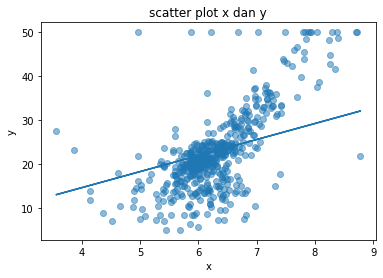

In [63]:
plt.scatter(x, y, alpha=0.5)
plt.plot(x, prediction)
plt.title('scatter plot x dan y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## sklearn

In [64]:
    from sklearn import linear_model
    from sklearn import datasets
    data = datasets.load_boston()

C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include t

In [65]:
df = pd.DataFrame(data.data, columns=data.feature_names)
target = pd.DataFrame(data.target, columns=['MEDV'])

In [66]:
x = df
y = target['MEDV']

In [67]:
lm = linear_model.LinearRegression()
model = lm.fit(x,y)

In [68]:
prediction = lm.predict(x)
print(prediction)

[30.00384338 25.02556238 30.56759672 28.60703649 27.94352423 25.25628446
 23.00180827 19.53598843 11.52363685 18.92026211 18.99949651 21.58679568
 20.90652153 19.55290281 19.28348205 19.29748321 20.52750979 16.91140135
 16.17801106 18.40613603 12.52385753 17.67103669 15.83288129 13.80628535
 15.67833832 13.38668561 15.46397655 14.70847428 19.54737285 20.8764282
 11.45511759 18.05923295  8.81105736 14.28275814 13.70675891 23.81463526
 22.34193708 23.10891142 22.91502612 31.35762569 34.21510225 28.02056414
 25.20386628 24.60979273 22.94149176 22.09669817 20.42320032 18.03655088
  9.10655377 17.20607751 21.28152535 23.97222285 27.6558508  24.04901809
 15.3618477  31.15264947 24.85686978 33.10919806 21.77537987 21.08493555
 17.8725804  18.51110208 23.98742856 22.55408869 23.37308644 30.36148358
 25.53056512 21.11338564 17.42153786 20.78483633 25.20148859 21.7426577
 24.55744957 24.04295712 25.50499716 23.9669302  22.94545403 23.35699818
 21.26198266 22.42817373 28.40576968 26.99486086 26.0

In [69]:
lm.score(x,y)

0.7406426641094094

## sklearn 2

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/CarPrice_Assignment.csv', usecols=['horsepower', 'price'])

In [72]:
df.head()

,horsepower,price
0,111,13495.0
1,111,16500.0
2,154,16500.0
3,102,13950.0
4,115,17450.0


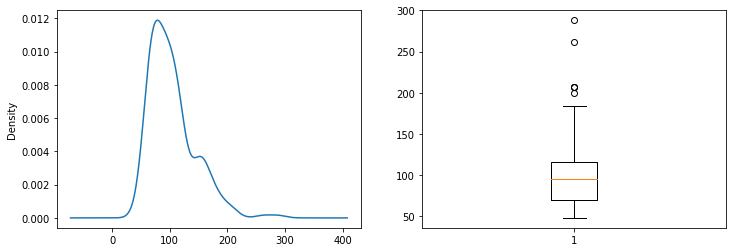

In [73]:
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['horsepower'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['horsepower'])
plt.show()

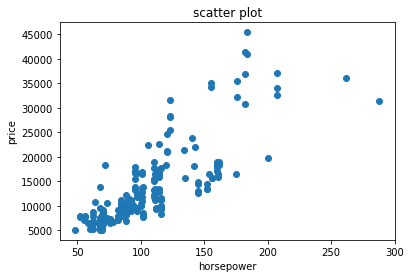

In [74]:
plt.scatter(df['horsepower'], df['price'])
plt.title('scatter plot')
plt.xlabel('horsepower')
plt.ylabel('price')
plt.show()

In [75]:
df.corr()

,horsepower,price
horsepower,1.000000,0.808139
price,0.808139,1.000000


In [77]:
x = df['horsepower'].values.reshape(-1, 1)
y = df['price'].values.reshape(-1, 1)

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [80]:
x_train.shape

(164, 1)

In [81]:
x_test.shape

(41, 1)

In [82]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [83]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(normalize=False)

In [84]:
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[156.84563866]]
[-3217.78001294]


In [85]:
lin_reg.score(x_test, y_test)

0.6771618943971325

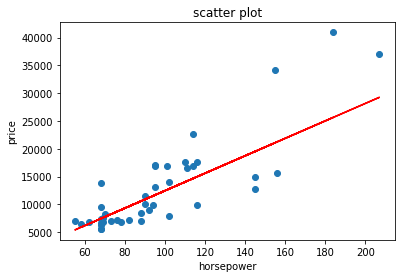

In [86]:
y_prediction = lin_reg.predict(x_test)

plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediction, c='r')
plt.title('scatter plot')
plt.xlabel('horsepower')
plt.ylabel('price')
plt.show()


In [87]:
lin_reg.predict([[100]])

array([[12466.78385283]])

In [88]:
lin_reg.predict([[150]])

array([[20309.06578571]])

In [89]:
lin_reg.predict([[200]])

array([[28151.34771859]])